# Hubble diagram
The relationship between the redshift (or recessional velocity) of galaxies and their distance from us, providing crucial evidence for the expanding universe.

### Setting the general code parameters

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from astropy import units

In [2]:
try:
  import AstronomyCalc
except:
  !pip install git+https://github.com/sambit-giri/AstronomyCalc.git
  import AstronomyCalc
from AstronomyCalc import create_data

### Original data used in Hubble (1929)
Edwin Hubble measured the recession velocity ($v$) of the galaxies at different distances ($d$). To explain this data, he fitted a line $v=H_0 d$, where $H_0$ is a constant. This constant tells us how fast objects are moving away from us, which is a fundamental aspect of cosmology.

In [3]:
dist_Hubble1929, vel_Hubble1929 = create_data.Hubble1929_data()

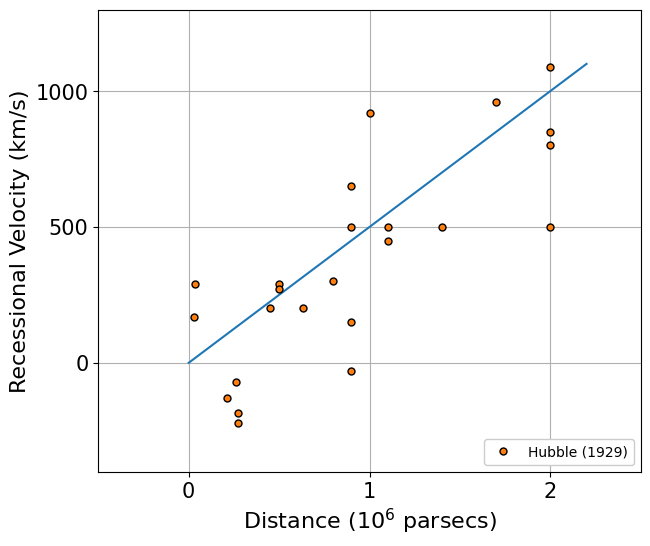

In [4]:
v_func = lambda r,H0: H0*r
rr = np.linspace(0,2.2)

fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.errorbar(dist_Hubble1929, vel_Hubble1929,
            ls=' ',
            color='C1',
            marker='o', markeredgecolor='k', markersize=5, 
            label='Hubble (1929)', zorder=5)
ax.plot(rr, v_func(rr,500), c='C0') # 500 km/s/Mpc is the value of Hubble constant estimated in Hubble (1929).
ax.legend(loc=4, facecolor='white', framealpha=1)
ax.set_xlabel(r'Distance ($10^6$ parsecs)', fontsize=16)
ax.set_ylabel(r'Recessional Velocity (km/s)', fontsize=16)
ax.set_xticks([0,1,2])
ax.set_yticks([0,500,1000])
ax.axis([-0.5,2.5,-400,1300])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.grid()
plt.show()

### Least Square Fit
To find the best fit model, we require a loss or cost function that describes how far the model is from the data. For the above data, we can find the best fit model by minimising the total squared error between the model and the observed data, which can be give as,

$r^2 = \sum_i \left[y_i-f(x_i|\theta)\right]^2$,

where $(x_i,y_i)$ are the data and $\theta$ represents the model parameters.

In [5]:
least_sq = lambda y,f: np.vectorize(lambda f: np.sum((y-f)**2))

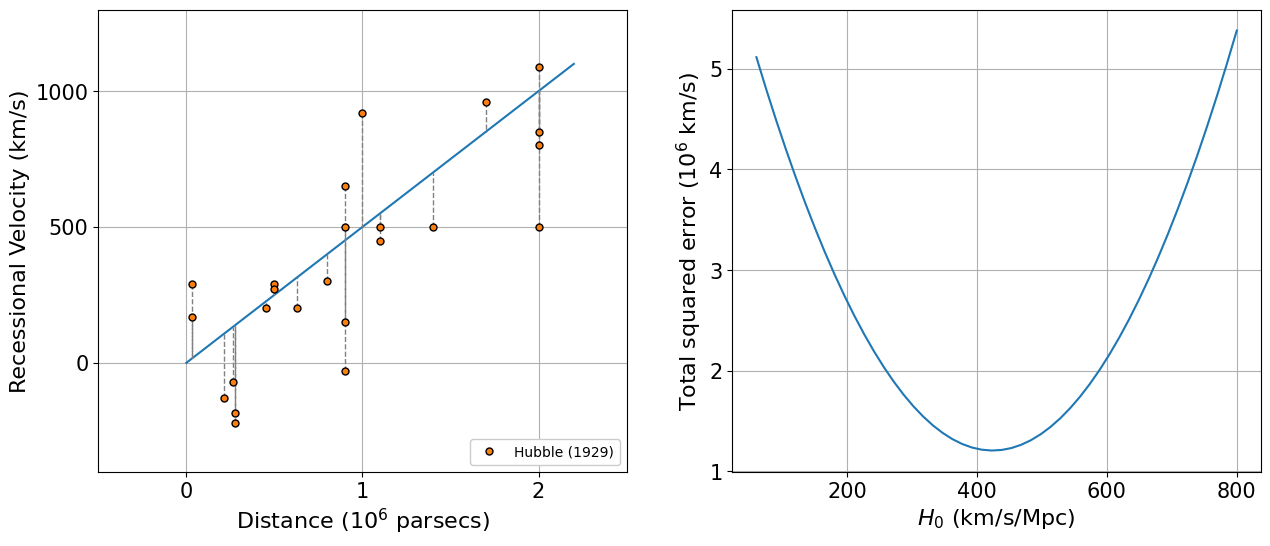

In [6]:
v_func = lambda r,H0: H0*r
rr = np.linspace(0,2.2)

fig, axs = plt.subplots(1,2,figsize=(15,6))
ax = axs[0]
ax.errorbar(dist_Hubble1929, vel_Hubble1929,
            ls=' ',
            color='C1',
            marker='o', markeredgecolor='k', markersize=5, 
            label='Hubble (1929)', zorder=5)
ax.plot(rr, v_func(rr,500), c='C0') # 500 km/s/Mpc is the value of Hubble constant estimated in Hubble (1929).
# Plot vertical lines from every data point to the line
for dist, vel in zip(dist_Hubble1929, vel_Hubble1929):
    ax.plot([dist, dist], [vel, v_func(dist, 500)], c='gray', linestyle='--', linewidth=1)
ax.legend(loc=4, facecolor='white', framealpha=1)
ax.set_xlabel(r'Distance ($10^6$ parsecs)', fontsize=16)
ax.set_ylabel(r'Recessional Velocity (km/s)', fontsize=16)
ax.set_xticks([0,1,2])
ax.set_yticks([0,500,1000])
ax.axis([-0.5,2.5,-400,1300])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.grid()

least_sq = lambda y,f: np.sum((y-f)**2)
H0_array = np.linspace(60,800)
least_sq_array = np.array([least_sq(vel_Hubble1929,v_func(dist_Hubble1929,Hi)) for Hi in H0_array])

ax = axs[1]

ax.plot(H0_array, least_sq_array/1e6, c='C0')
# ax.legend(loc=4, facecolor='white', framealpha=1)
ax.set_xlabel(r'$H_0$ (km/s/Mpc)', fontsize=16)
ax.set_ylabel(r'Total squared error ($10^6$ km/s)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.grid()

plt.show()

### Generate synthetic supernova data

We generate distance modulus data $\mu(z)$ given as,

$\mu(z) = 5\log_{10}\left(\frac{d_L(z)}{1~\mathrm{Mpc}}\right)+25$ ,

where $d_L$ is the luminosity distance estimated by observing supernova. This distance is related to the comoving distance $d_c(z)$ as,

$d_L(z) = (1+z) d_c(z) = (1+z)\frac{c}{H_0}\int\frac{dz}{\left[\Omega_m(1+z)^3+\Omega_\Lambda\right]^{1/2}}$ .

In [7]:
code_param_dict = {'zmin': 0.001, 'zmax': 3.0, 'Nz': 100, 'verbose': True}
cosmo_dict = {'Om': 0.30, 'Or': 0, 'Ok': 0, 'Ode': 0.70, 'h': 0.70}
param = AstronomyCalc.param(cosmo=cosmo_dict, code=code_param_dict)

print('Cosmological parameters')
print(param.cosmo.__dict__)
print('Code parameters')
print(param.code.__dict__)

Cosmological parameters
{'Om': 0.3, 'Or': 0, 'Ok': 0, 'Ode': 0.7, 'h': 0.7, 'Tcmb': 2.725}
Code parameters
{'zmin': 0.001, 'zmax': 3.0, 'Nz': 100, 'verbose': True}


In [8]:
z_true = np.linspace(0.01, 2, 1000)
mu_true = AstronomyCalc.distance_modulus(param, z=z_true)

z_sample, mu_sample, dmu = create_data.generate_distance_modulus()
print(z_sample.shape, mu_sample.shape, dmu.shape)

(100,) (100,) (100,)


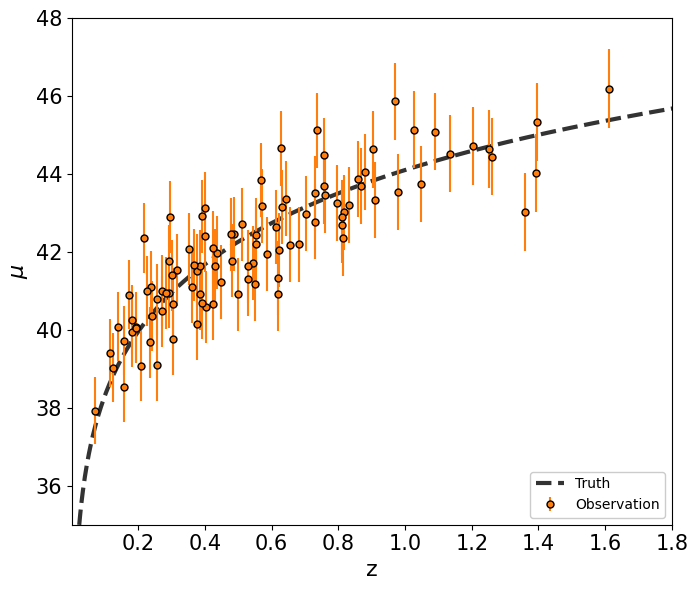

In [9]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.errorbar(z_sample, mu_sample, yerr=dmu,
            ls=' ',
            color='C1',
            marker='o', markeredgecolor='k', markersize=5, 
            label='Observation', zorder=5)
ax.plot(z_true, mu_true, c='k', alpha=0.8, lw=3, ls='--', label='Truth')
ax.legend(loc=4, facecolor='white', framealpha=1)
ax.set_xlabel(r'z', fontsize=16)
ax.set_ylabel(r'$\mu$', fontsize=16)
ax.axis([0.001,1.8,35,48])
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()

### Posterior distribution

To find a model for a dataset with errorbar, we can define the loss function using the posterior distribution defined by the [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) as,

$p(\theta|{x_i,y_i})\propto p({x_i,y_i}|\theta) p(\theta)$ ,

where $p({x_i,y_i}|\theta)$ and $p(\theta)$ are the data likelihood and the prior distribution, respectively.

Based on the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), the each supernova data point can be assumed to be well defined by Gaussian distribution and, therefore, the likelihood can be given as,

$p({x_i,y_i}|\theta) = \frac{1}{\sqrt{2\pi\sigma^2_i}} \mathrm{exp}\left(-\frac{[y_i-f(x_i|\theta)]^2}{2\sigma^2_i}\right)$ ,

where $\sigma_i$ is the standard deviation of the $i^\mathrm{th}$ data point. If we assume no prior knowledge, then $p(\theta)=1$. Instead of likelihood ($L$), it is more convenient to work with log-likelihood:

$\log(L) \propto - \sum^N_i \left(\frac{[y_i-f(x_i|\theta)]^2}{2\sigma^2_i}\right)$, 

which should maximize for the best-fit. Therefore the loss function should be:

$_{~~\theta}^\mathrm{min}\sum^N_i \left(\frac{[y_i-f(x_i|\theta)]^2}{2\sigma^2_i}\right)$

### Linear Regression
This regression finds a parametric model where $f(x|\theta)=\sum^k_p\theta_p g_p(x)$, where the functions $g_p(x)$ can be nonlinear functions of x.

For a straight-line, $f(x|\theta)=\theta_0 + \theta_1 x$.

In [10]:
from astroML.linear_model import LinearRegression

/Users/sambit/miniconda3/envs/py3/lib/python3.10/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [11]:
model = LinearRegression()
model.fit(z_sample[:,None], mu_sample, dmu)

zz = np.linspace(0,2)
mu_line = model.predict(zz[:,None])
print(mu_line.shape)

(50,)


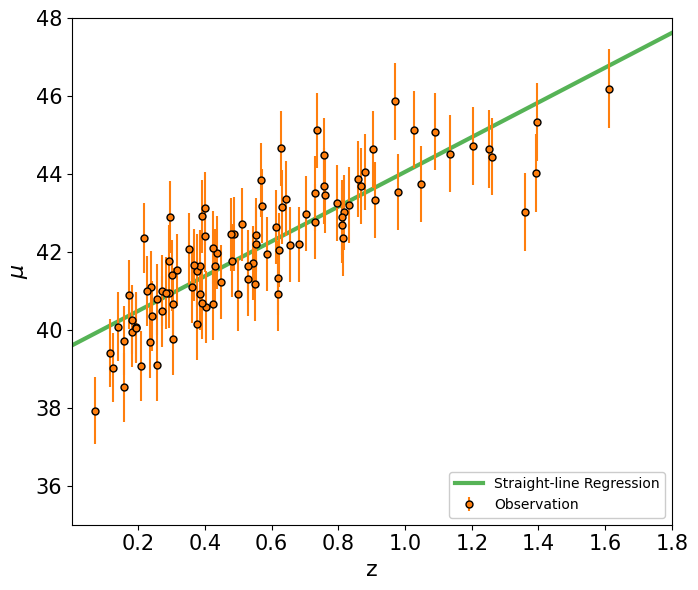

In [12]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.errorbar(z_sample, mu_sample, yerr=dmu,
            ls=' ',
            color='C1',
            marker='o', markeredgecolor='k', markersize=5, 
            label='Observation', zorder=5)
ax.plot(zz, mu_line, c='C2', alpha=0.8, lw=3, label='Straight-line Regression')
ax.legend(loc=4, facecolor='white', framealpha=1)
ax.set_xlabel(r'z', fontsize=16)
ax.set_ylabel(r'$\mu$', fontsize=16)
ax.axis([0.001,1.8,35,48])
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()

### Polynomial Regression
This is also a linear regression, but higher order dependence on the independent variable is explored, which means $g_p(x)$ is could be higher order polynomial.

In [13]:
from astroML.linear_model import PolynomialRegression

For a third-order polynomial, $f(x|\theta)=\theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$.

In [14]:
model = PolynomialRegression(degree=3)
model.fit(z_sample[:,None], mu_sample, dmu)

zz = np.linspace(0,2)
mu_poly3 = model.predict(zz[:,None])
print(mu_poly3.shape)

(50,)


For a fifth-order polynomial, $f(x|\theta)=\theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5$.

In [15]:
model = PolynomialRegression(degree=5)
model.fit(z_sample[:,None], mu_sample, dmu)

zz = np.linspace(0,2)
mu_poly5 = model.predict(zz[:,None])
print(mu_poly5.shape)

(50,)


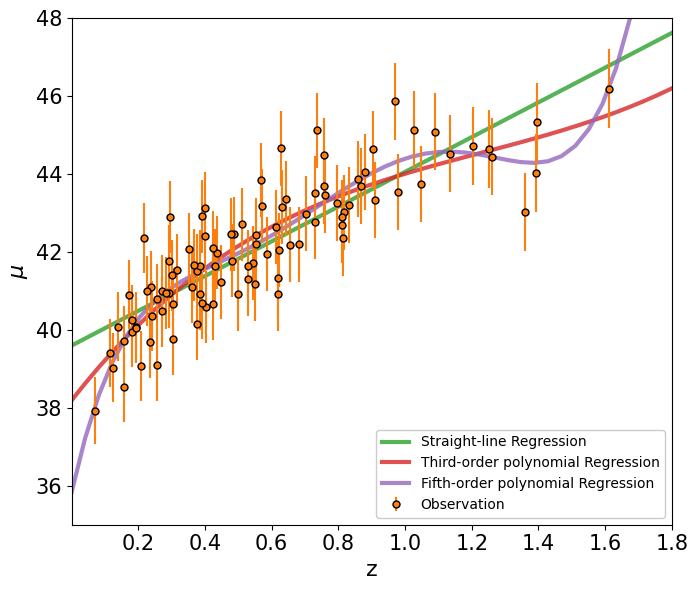

In [16]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.errorbar(z_sample, mu_sample, yerr=dmu,
            ls=' ',
            color='C1',
            marker='o', markeredgecolor='k', markersize=5, 
            label='Observation', zorder=5)
ax.plot(zz, mu_line, c='C2', alpha=0.8, lw=3, label='Straight-line Regression')
ax.plot(zz, mu_poly3, c='C3', alpha=0.8, lw=3, label='Third-order polynomial Regression')
ax.plot(zz, mu_poly5, c='C4', alpha=0.8, lw=3, label='Fifth-order polynomial Regression')
ax.legend(loc=4, facecolor='white', framealpha=1)
ax.set_xlabel(r'z', fontsize=16)
ax.set_ylabel(r'$\mu$', fontsize=16)
ax.axis([0.001,1.8,35,48])
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()

### Underfitting vs overfitting

To illustrate this effect, we consider a simple example $y=x \sin(x)$ with some scatter.

In [17]:
x_simple = np.linspace(0,3,20)
yerr_simple = 0.01*np.ones_like(x_simple)
y_simple = 0.2+x_simple*np.sin(x_simple)+0.1*np.random.randn(len(x_simple))

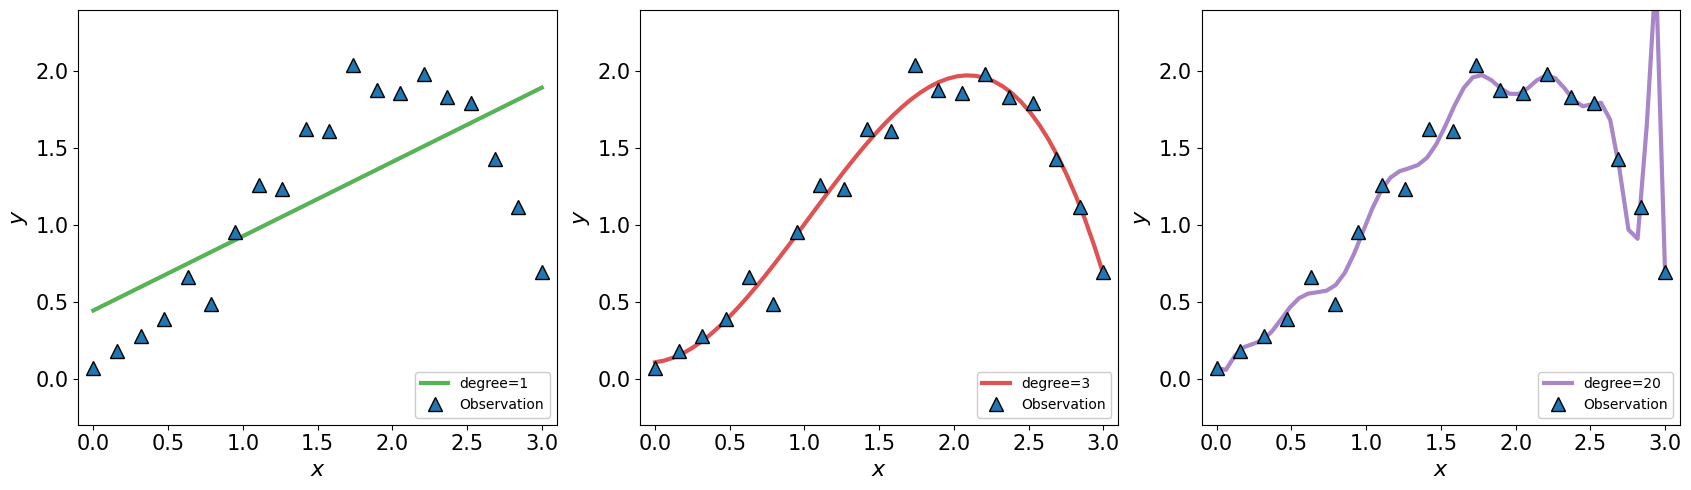

In [18]:
fig, axs = plt.subplots(1,3,figsize=(17,5))

for i,deg in enumerate([1,3,20]):
    ax = axs[i]
    model = PolynomialRegression(degree=deg)
    model.fit(x_simple[:,None], y_simple, yerr_simple)
    xx = np.linspace(0,3)
    yy = model.predict(xx[:,None])
    
    ax.errorbar(x_simple, y_simple,
                ls=' ',
                color='C0',
                marker='^', markeredgecolor='k', markersize=10, 
                label='Observation', zorder=5)
    ax.plot(xx, yy, c=f'C{i+2}', lw=3, alpha=0.8, label=f'degree={deg}')
    ax.legend(loc=4, facecolor='white', framealpha=1)
    ax.set_xlabel(r'$x$', fontsize=16)
    ax.set_ylabel(r'$y$', fontsize=16)
    ax.axis([-0.1,3.1,-0.3,2.4])
    ax.tick_params(axis='both', which='major', labelsize=15) 

plt.tight_layout()
plt.show()

### Cross-Validation

We divide the data into three sets: training, validation and testing set. In this method, the model is fit on the training set and validated using the validation set for different complexity of the model.

In [19]:
from sklearn.model_selection import train_test_split

X, y = x_simple.copy(), y_simple.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
yerr_train, yerr_val, yerr_test = yerr_simple[:len(y_train)], yerr_simple[:len(y_val)], yerr_simple[:len(y_test)]

print('Full data:', X.shape, y.shape)
print('Training data:', X_train.shape, y_train.shape)
print('Validation data:', X_val.shape, y_val.shape)
print('Testing data:', X_test.shape, y_test.shape)

Full data: (20,) (20,)
Training data: (14,) (14,)
Validation data: (3,) (3,)
Testing data: (3,) (3,)


We can define the "Goodness of fit" using mean squared error (MSE):

$\mathrm{MSE} = \frac{1}{N}\sum^N_i \left[y_i-f(x_i|\theta)\right]^2$

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
degree_list = np.arange(15)
mse_train = np.zeros_like(degree_list, dtype=float)
mse_val   = np.zeros_like(degree_list, dtype=float)

for i,deg in enumerate(degree_list):
    model = PolynomialRegression(degree=deg)
    model.fit(X_train[:,None], y_train, yerr_train)
    y_pred = model.predict(X_val[:,None])
    mse_val[i] = mean_squared_error(y_val,y_pred)
    y_pred = model.predict(X_train[:,None])
    mse_train[i] = mean_squared_error(y_train,y_pred)

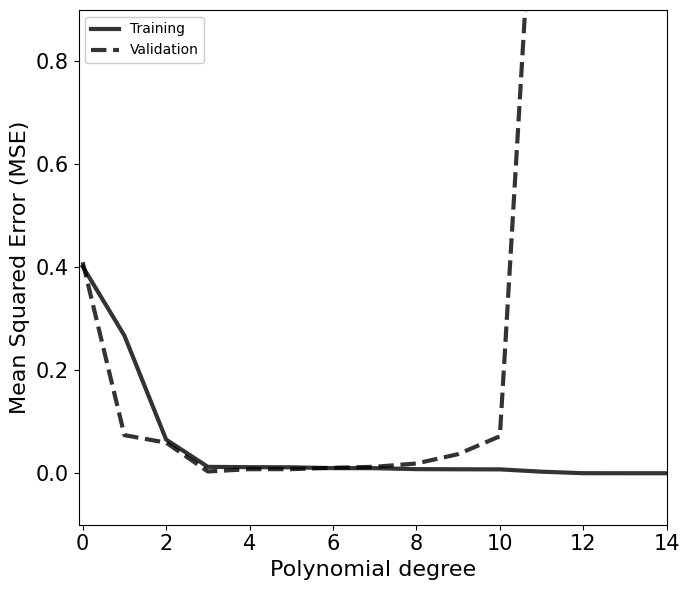

In [22]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.plot(degree_list, mse_train, c='k', alpha=0.8, lw=3, ls='-', label='Training')
ax.plot(degree_list, mse_val, c='k', alpha=0.8, lw=3, ls='--', label='Validation')
ax.legend(loc=2, facecolor='white', framealpha=1)
ax.set_xlabel(r'Polynomial degree', fontsize=16)
ax.set_ylabel(r'Mean Squared Error (MSE)', fontsize=16)
ax.axis([-0.1,14,-0.1,0.9])
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()

Multiple options for the degree of the polynomial is possible based on the above plot. Based on the Occam's razor, the simplest models among them should be choosen.

A general metric to test this criteria is Bayesian Information Criteria (BIC) defined as,

$\mathrm{BIC} = k\log(N)-2\log(L_\mathrm{max})$ ,

where $k$ and $N$ are the number of degrees of freedom and data points, respectively. $L_\mathrm{max}$ is the maximum likelihood values from the training process.

In [23]:
def BIC(model, X_train, y_train, N):
    k = model.degree
    y_pred = model.predict(X_train[:,None])
    Lmax = np.exp(- mean_squared_error(y_train,y_pred)*N)
    # print(N, k*np.log(N),Lmax)
    bic = k*np.log(N)-2*np.log(Lmax)
    return bic

In [24]:
degree_list = np.arange(15)
bic_train = np.zeros_like(degree_list, dtype=float)
bic_val   = np.zeros_like(degree_list, dtype=float)

for i,deg in enumerate(degree_list):
    model = PolynomialRegression(degree=deg)
    model.fit(X_train[:,None], y_train, yerr_train)
    y_pred = model.predict(X_val[:,None])
    bic_val[i] = BIC(model,X_val,y_val,X_train.shape[0])
    y_pred = model.predict(X_train[:,None])
    bic_train[i] = BIC(model,X_train,y_train,X_train.shape[0])

/var/folders/wv/qwzjbf6s2c3cghfssgh619600000gr/T/ipykernel_87888/201466960.py:6: RuntimeWarning: divide by zero encountered in log
  bic = k*np.log(N)-2*np.log(Lmax)


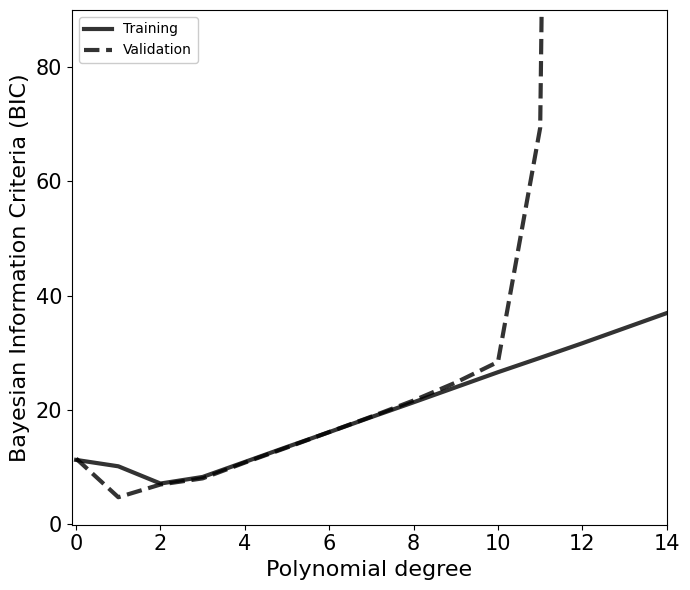

In [25]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.plot(degree_list, bic_train, c='k', alpha=0.8, lw=3, ls='-', label='Training')
ax.plot(degree_list, bic_val, c='k', alpha=0.8, lw=3, ls='--', label='Validation')
ax.legend(loc=2, facecolor='white', framealpha=1)
ax.set_xlabel(r'Polynomial degree', fontsize=16)
ax.set_ylabel(r'Bayesian Information Criteria (BIC)', fontsize=16)
ax.axis([-0.1,14,-0.1,90])
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()

### Polynomial Regression of Supernova data

In [26]:
from sklearn.model_selection import train_test_split

X, y = z_sample.copy(), np.vstack((mu_sample,dmu)).T.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
y_train, yerr_train = y_train[:,0], y_train[:,1]
y_test, yerr_test = y_test[:,0], y_test[:,1]
y_val, yerr_val = y_val[:,0], y_val[:,1]

print('Full data:', X.shape, y.shape)
print('Training data:', X_train.shape, y_train.shape, yerr_train.shape)
print('Validation data:', X_val.shape, y_val.shape, yerr_val.shape)
print('Testing data:', X_test.shape, y_test.shape, yerr_test.shape)

Full data: (100,) (100, 2)
Training data: (70,) (70,) (70,)
Validation data: (15,) (15,) (15,)
Testing data: (15,) (15,) (15,)


In [27]:
degree_list = np.arange(15)
mse_train = np.zeros_like(degree_list, dtype=float)
mse_val   = np.zeros_like(degree_list, dtype=float)

for i,deg in enumerate(degree_list):
    model = PolynomialRegression(degree=deg)
    model.fit(X_train[:,None], y_train, yerr_train)
    y_pred = model.predict(X_val[:,None])
    mse_val[i] = mean_squared_error(y_val,y_pred)
    y_pred = model.predict(X_train[:,None])
    mse_train[i] = mean_squared_error(y_train,y_pred)

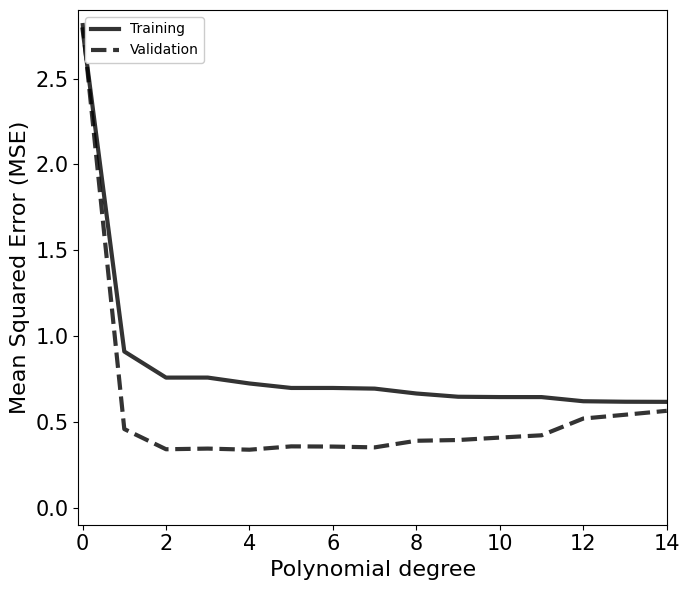

In [28]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.plot(degree_list, mse_train, c='k', alpha=0.8, lw=3, ls='-', label='Training')
ax.plot(degree_list, mse_val, c='k', alpha=0.8, lw=3, ls='--', label='Validation')
ax.legend(loc=2, facecolor='white', framealpha=1)
ax.set_xlabel(r'Polynomial degree', fontsize=16)
ax.set_ylabel(r'Mean Squared Error (MSE)', fontsize=16)
ax.axis([-0.1,14,-0.1,2.9])
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()

In [29]:
degree_list = np.arange(15)
bic_train = np.zeros_like(degree_list, dtype=float)
bic_val   = np.zeros_like(degree_list, dtype=float)

for i,deg in enumerate(degree_list):
    model = PolynomialRegression(degree=deg)
    model.fit(X_train[:,None], y_train, yerr_train)
    y_pred = model.predict(X_val[:,None])
    bic_val[i] = BIC(model,X_val,y_val,X_train.shape[0])
    y_pred = model.predict(X_train[:,None])
    bic_train[i] = BIC(model,X_train,y_train,X_train.shape[0])

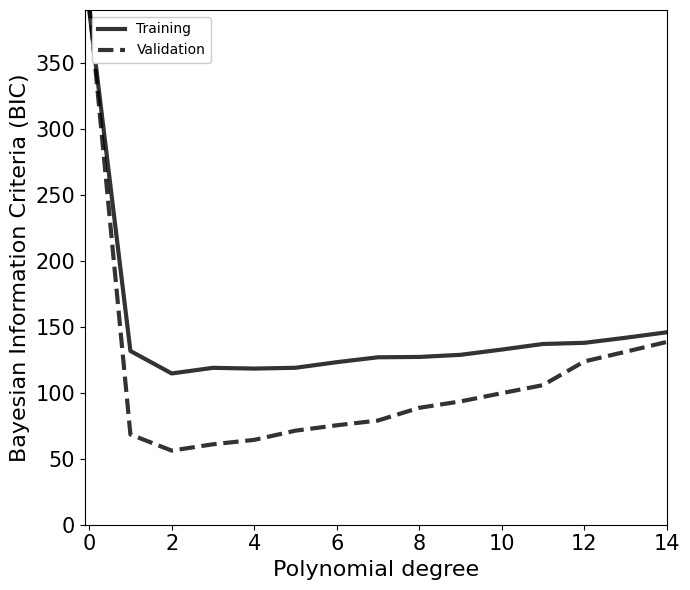

In [30]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.plot(degree_list, bic_train, c='k', alpha=0.8, lw=3, ls='-', label='Training')
ax.plot(degree_list, bic_val, c='k', alpha=0.8, lw=3, ls='--', label='Validation')
ax.legend(loc=2, facecolor='white', framealpha=1)
ax.set_xlabel(r'Polynomial degree', fontsize=16)
ax.set_ylabel(r'Bayesian Information Criteria (BIC)', fontsize=16)
ax.axis([-0.1,14,-0.1,390])
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()

In [31]:
model = PolynomialRegression(degree=2)
model.fit(z_sample[:,None], mu_sample, dmu)

zz = np.linspace(0,2)
mu_poly = model.predict(zz[:,None])
print(mu_poly.shape)

(50,)


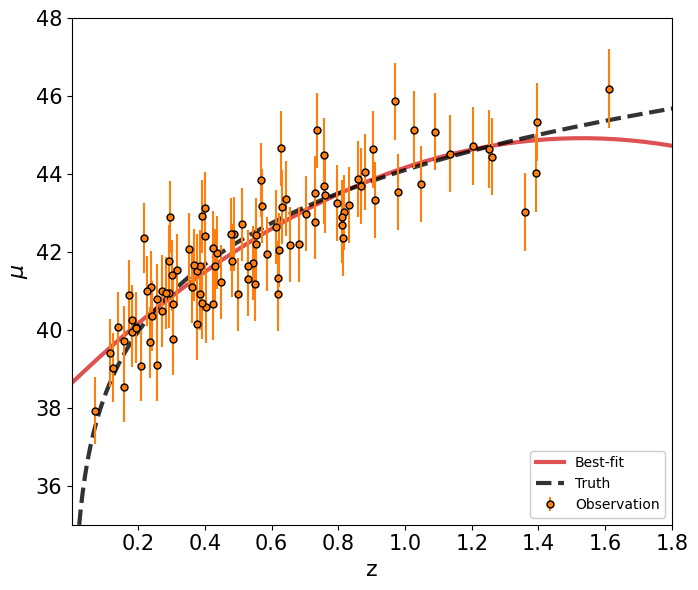

In [32]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.errorbar(z_sample, mu_sample, yerr=dmu,
            ls=' ',
            color='C1',
            marker='o', markeredgecolor='k', markersize=5, 
            label='Observation', zorder=5)
ax.plot(zz, mu_poly, c='C3', alpha=0.8, lw=3, label='Best-fit')
ax.plot(z_true, mu_true, c='k', alpha=0.8, lw=3, ls='--', label='Truth')
ax.legend(loc=4, facecolor='white', framealpha=1)
ax.set_xlabel(r'z', fontsize=16)
ax.set_ylabel(r'$\mu$', fontsize=16)
ax.axis([0.001,1.8,35,48])
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()

#### Basis Function Regression

In the linear regression framework, various categories of basis functions can be used instead of polynomials. These include Gaussian functions, trigonometric functions, Fourier basis functions, and spline functions. Below we show an example with Gaussian functions, represented as: $g_p(x) = \mathcal{N}(\mu_1,\sigma_1)$. These basis functions transform the input variable xx into a higher-dimensional space, allowing for more complex relationships to be captured. Gaussian functions offer a flexible approach to modeling nonlinear relationships between variables within the linear regression framework.

In [33]:
from astroML.linear_model import BasisFunctionRegression

In [34]:
mu = np.linspace(0,1,6)[:,None]
sigma = 0.1

model = BasisFunctionRegression('gaussian', mu=mu, sigma=sigma)
model.fit(X_train[:,None], y_train, yerr_train)
zz = np.linspace(0,2)
mu_basis = model.predict(zz[:,None])

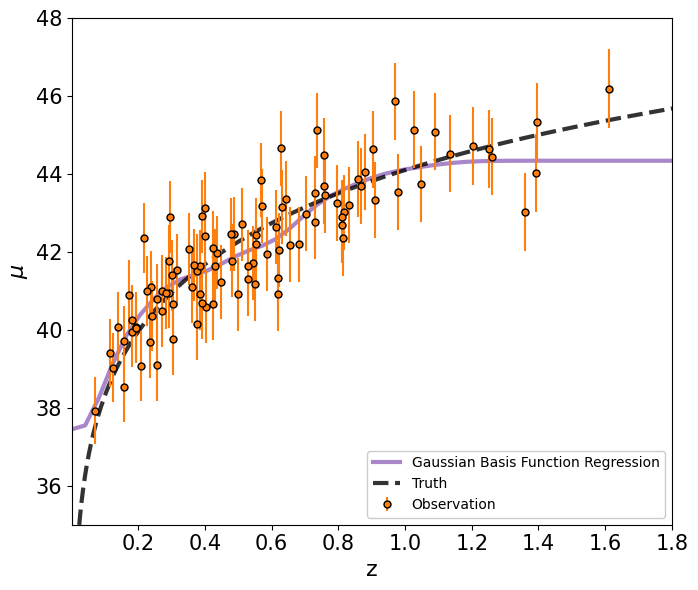

In [35]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.errorbar(z_sample, mu_sample, yerr=dmu,
            ls=' ',
            color='C1',
            marker='o', markeredgecolor='k', markersize=5, 
            label='Observation', zorder=5)
ax.plot(zz, mu_basis, c='C4', alpha=0.8, lw=3, label='Gaussian Basis Function Regression')
ax.plot(z_true, mu_true, c='k', alpha=0.8, lw=3, ls='--', label='Truth')
ax.legend(loc=4, facecolor='white', framealpha=1)
ax.set_xlabel(r'z', fontsize=16)
ax.set_ylabel(r'$\mu$', fontsize=16)
ax.axis([0.001,1.8,35,48])
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()

### Learning about cosmology

Within our standard cosmological framework, we can approximate the luminosity distance of these supernovae using the following relation:

$d_L\approx \frac{c}{H_0}z\left(1+\frac{1-q_0}{2}z\right)$ ,

where $q_0$ is the deceleration paremeter. This parameter is related to the scale factor $a(t)$ as

$q_0=-\left(\frac{\ddot{a}a}{\dot{a}^2}\right)_{t=t_0}=-\left(\frac{\ddot{a}}{aH^2}\right)_{t=t_0}$ .

With this expression, the distance modulus becomes:

$\mu(z) \approx 43.17 - 5\log_{10}\left(\frac{H_0}{70~\mathrm{km/s/Mpc}}\right)+5\log_{10}(z)+1.086(1-q_0)z$ .

For more description of the above expressions, see chapter 7 (or 6) of [Introduction to cosmology, first (or second) edition, by Barbara Ryden](https://ui.adsabs.harvard.edu/abs/2016inco.book.....R/abstract).

In [36]:
def dlum_linear(z, H0=70., q0=-0.55):
    c = 3e8*units.m/units.s
    if isinstance(H0,(int,float)):
        H0 = H0*units.km/units.s/units.Mpc
    d_hubble = (c/H0).to('Mpc')
    dL = d_hubble*z*(1+(1-q0)/2*z)
    return dL

def mu_linear(z, H0=70., q0=-0.55):
    c = 3e8*units.m/units.s
    if isinstance(H0,(int,float)):
        H0 = H0*units.km/units.s/units.Mpc
    H0_70 = 70*units.km/units.s/units.Mpc
    mu = 43.17 - 5*np.log10((H0/H0_70).to('').value)+5*np.log10(z)+1.086*(1-q0)*z
    return mu

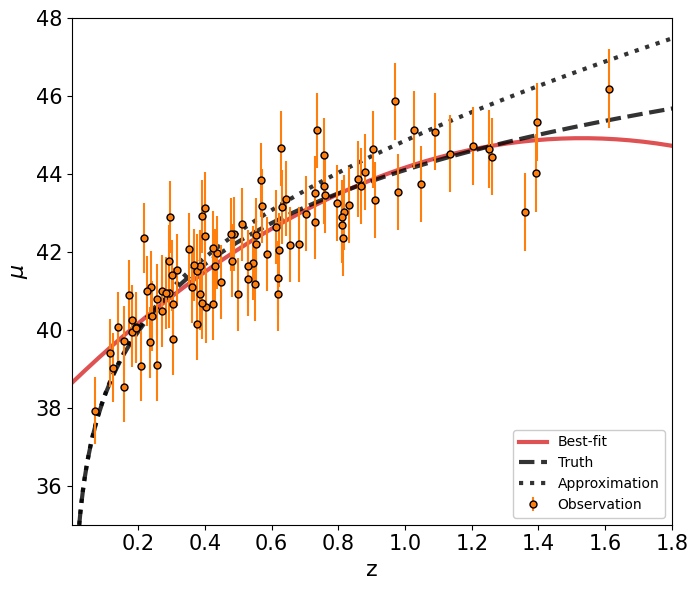

In [37]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.errorbar(z_sample, mu_sample, yerr=dmu,
            ls=' ',
            color='C1',
            marker='o', markeredgecolor='k', markersize=5, 
            label='Observation', zorder=5)
ax.plot(zz, mu_poly, c='C3', alpha=0.8, lw=3, label='Best-fit')
ax.plot(z_true, mu_true, c='k', alpha=0.8, lw=3, ls='--', label='Truth')
ax.plot(z_true, mu_linear(z_true), c='k', alpha=0.8, lw=3, ls=':', label='Approximation')
ax.legend(loc=4, facecolor='white', framealpha=1)
ax.set_xlabel(r'z', fontsize=16)
ax.set_ylabel(r'$\mu$', fontsize=16)
ax.axis([0.001,1.8,35,48])
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()